In [1]:
# python
from tqdm.notebook import tqdm
import sys
import os
import importlib
# columnar analysis
import awkward as ak
import mplhep as hep
import numpy as np
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

In [2]:
def structure(vari, cha1, cha2):
    print("4mu {0} structure: {1}".format(vari, cha1))
    print("2mu2e {0} structure: {1}".format(vari, cha2))
    
    return vari

In [3]:
samples_2mu2e = [
    '2mu2e_500GeV_5GeV_0p08mm',
    '2mu2e_500GeV_5GeV_0p8mm',
    '2mu2e_500GeV_5GeV_8p0mm',
    '2mu2e_500GeV_5GeV_40p0mm',
    '2mu2e_500GeV_5GeV_80p0mm',
]

samples_4mu = [
    '4mu_500GeV_5GeV_0p08mm',
    '4mu_500GeV_5GeV_0p8mm',
    '4mu_500GeV_5GeV_8p0mm',
    '4mu_500GeV_5GeV_40p0mm',
    '4mu_500GeV_5GeV_80p0mm',
]

In [4]:
fileset_4mu = utilities.make_fileset(samples_4mu, "llpNanoAOD_v1_merged")
fileset_2mu2e = utilities.make_fileset(samples_2mu2e, "llpNanoAOD_v1_merged")

events_2mu2e, events_4mu = {}, {}

for i in tqdm(samples_2mu2e):
    fname = fileset_2mu2e[i][0]
    print(fname)
    events_2mu2e[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events().Photon
    
for i in tqdm(samples_4mu):
    fname = fileset_4mu[i][0]
    print(fname)
    events_4mu[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events().Photon

  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p8.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-8p0.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-40p0.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-80p0.root


  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p08.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p8.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-8p0.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-40p0.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-80p0.root


In [6]:
print(events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].fields)

['dEscaleDown', 'dEscaleUp', 'dEsigmaDown', 'dEsigmaUp', 'eCorr', 'energyErr', 'eta', 'hoe', 'mass', 'mvaID', 'mvaID_Fall17V1p1', 'pfRelIso03_all', 'pfRelIso03_chg', 'phi', 'pt', 'r9', 'sieie', 'charge', 'cutBased', 'cutBased_Fall17V1Bitmap', 'electronIdx', 'jetIdx', 'pdgId', 'vidNestedWPBitmap', 'electronVeto', 'isScEtaEB', 'isScEtaEE', 'mvaID_WP80', 'mvaID_WP90', 'pixelSeed', 'seedGain', 'genPartIdx', 'genPartFlav', 'cleanmask', 'electronIdxG', 'genPartIdxG', 'jetIdxG']


# Basic Information
## We want basic 4 vector or related variables

## eta

4mu eta structure: [[], [], [], [], [], [], [], [], [], [], ... [], [-2.68], [], [], [], [], [], [], []]
2mu2e eta structure: [[-0.31, -0.278], [-1.66, -1.72], [-0.0543], ... [0.495, 0.457], [0.493], [-0.885]]
4mu eta structure: [[], [], [], [], [], [], [-1.07], [], [], ... [], [], [], [], [], [], [], [-1.71]]
2mu2e eta structure: [[1.41, 1.37], [-0.0929, -0.0132], [-0.41, ... -1.06], [0.477], [-1.09, -1.07]]
4mu eta structure: [[], [], [], [], [], [], [], [], [], ... [0.206], [], [], [], [1.45], [], [], []]
2mu2e eta structure: [[1.3, 1.26], [0.584, 0.511], [-1.74], ... [-1.15, -1.1], [-1.01, -1.78], [-0.0221]]
4mu eta structure: [[], [-0.837], [-0.524, 0.148], [], [], [], ... [], [], [], [], [-2.6], [0.583]]
2mu2e eta structure: [[2.48], [0.181], [], [], [], ... [-1.03, -1.06], [-0.836, -0.854], [1.85]]
4mu eta structure: [[], [], [], [], [], [], [], [], [], [], ... [], [], [], [0.973], [], [], [], [], []]
2mu2e eta structure: [[], [], [], [-1.91, -2.18], [-1.67], ... [-0.00563], [],

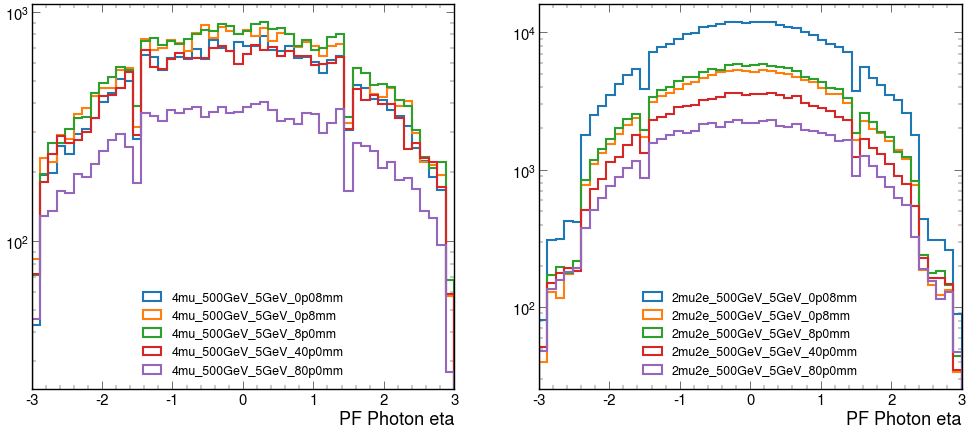

In [7]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("eta", events_4mu[i_4mu].eta, events_2mu2e[i_2mu].eta)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].eta), range=(-3,3), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].eta), range=(-3,3), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-3,3)
ax[1].set_xlim(-3,3)
ax[0].set_xlabel('PF Photon eta')
ax[1].set_xlabel('PF Photon eta')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/PF_PHOTON/Basic/eta.png", bbox_inches="tight")

## mass

4mu mass structure: [[], [], [], [], [], [], [], [], [], [], ... [], [0], [], [], [], [], [], [], []]
2mu2e mass structure: [[0, 0], [0, 0], [0], [0], [0, 0], [0], ... [0], [0], [0, 0], [0, 0], [0], [0]]
4mu mass structure: [[], [], [], [], [], [], [0], [], [], [], ... [], [], [], [], [], [], [], [], [0]]
2mu2e mass structure: [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], ... [0, 0], [0, 0], [0, 0], [0], [0, 0]]
4mu mass structure: [[], [], [], [], [], [], [], [], [], [], ... [], [0], [], [], [], [0], [], [], []]
2mu2e mass structure: [[0, 0], [0, 0], [0], [0], [0, 0], [0, 0, ... [0, 0], [0, 0], [0, 0], [0, 0], [0]]
4mu mass structure: [[], [0], [0, 0], [], [], [], [], [], [], ... [], [], [], [], [], [], [], [0], [0]]
2mu2e mass structure: [[0], [0], [], [], [], [], [0, 0], [], [0, ... [0], [0], [0, 0], [0, 0], [0, 0], [0]]
4mu mass structure: [[], [], [], [], [], [], [], [], [], [], ... [], [], [], [0], [], [], [], [], []]
2mu2e mass structure: [[], [], [], [0, 0], [0], [0], [0, 0], [], ..

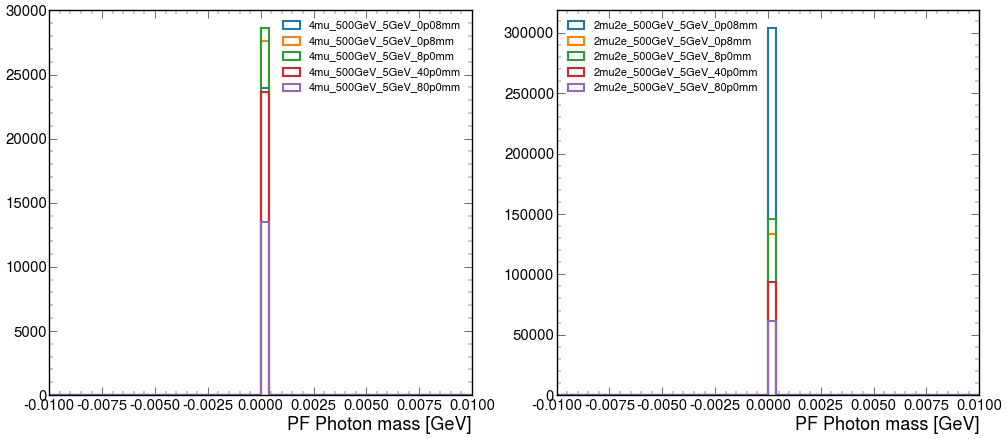

In [10]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("mass", events_4mu[i_4mu].mass, events_2mu2e[i_2mu].mass)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].mass), range=(-0.01,0.01), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].mass), range=(-0.01,0.01), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)

ax[0].set_xlim(-0.01,0.01)
ax[1].set_xlim(-0.01,0.01)
ax[0].set_xlabel('PF Photon mass [GeV]')
ax[1].set_xlabel('PF Photon mass [GeV]')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
plt.savefig("../Plots/PF_PHOTON/Basic/mass.png", bbox_inches="tight")

## phi

4mu phi structure: [[], [], [], [], [], [], [], [], [], [], ... [], [0.368], [], [], [], [], [], [], []]
2mu2e phi structure: [[-1.01, -1.05], [-0.475, -0.47], [-2.42], ... [-0.22, -0.261], [-2.27], [0.925]]
4mu phi structure: [[], [], [], [], [], [], [-0.807], [], [], ... [], [], [], [], [], [], [], [1.65]]
2mu2e phi structure: [[-1.97, -2.01], [-2.88, -2.91], [1.52, ... -2.32, -2.28], [2.87], [-0.79, -0.921]]
4mu phi structure: [[], [], [], [], [], [], [], [], [], ... [0.703], [], [], [], [-0.853], [], [], []]
2mu2e phi structure: [[1.48, 1.48], [-1.54, -1.62], [-0.599], ... [1.79, 1.82], [2.58, -2.38], [-1.59]]
4mu phi structure: [[], [-1.97], [2.5, -2.44], [], [], [], ... [], [], [], [], [], [0.73], [-0.0275]]
2mu2e phi structure: [[2.61], [2.6], [], [], [], [], ... -3.08], [-2.32, -2.28], [1.91, 1.94], [0.413]]
4mu phi structure: [[], [], [], [], [], [], [], [], [], [], ... [], [], [], [2.13], [], [], [], [], []]
2mu2e phi structure: [[], [], [], [2.16, 1.24], [0.548], [-2.34], ..

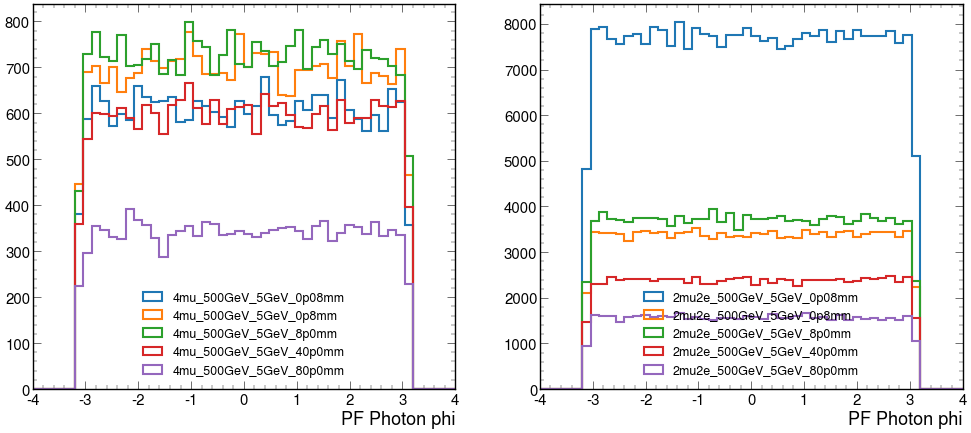

In [22]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("phi", events_4mu[i_4mu].phi, events_2mu2e[i_2mu].phi)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].phi), range=(-4,4), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].phi), range=(-4,4), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
ax[0].set_xlim(-4,4)
ax[1].set_xlim(-4,4)
ax[0].set_xlabel('PF Photon phi')
ax[1].set_xlabel('PF Photon phi')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18, loc='lower center')
plt.savefig("../Plots/PF_PHOTON/Basic/phi.png", bbox_inches="tight")

## pt

4mu pt structure: [[], [], [], [], [], [], [], [], [], [], ... [], [20], [], [], [], [], [], [], []]
2mu2e pt structure: [[106, 103], [167, 66.2], [270], [239], ... [207, 116], [231, 154], [237], [232]]
4mu pt structure: [[], [], [], [], [], [], [15.4], [], [], ... [], [], [], [], [], [], [], [], [20.3]]
2mu2e pt structure: [[149, 113], [180, 19.1], [236, 11.2], ... 20.6], [234, 92.7], [249], [111, 21.9]]
4mu pt structure: [[], [], [], [], [], [], [], [], [], ... [15.6], [], [], [], [22.4], [], [], []]
2mu2e pt structure: [[184, 67.9], [227, 15.6], [204], [252], ... 81.4], [134, 32.5], [269, 88.7], [206]]
4mu pt structure: [[], [19.8], [34.3, 13.4], [], [], [], [], ... [], [], [], [], [], [15], [84.8]]
2mu2e pt structure: [[16.9], [17.6], [], [], [], [], ... [106, 41.3], [198, 83.7], [237, 52.6], [123]]
4mu pt structure: [[], [], [], [], [], [], [], [], [], [], ... [], [], [], [64.5], [], [], [], [], []]
2mu2e pt structure: [[], [], [], [220, 37.5], [144], [303], ... [239], [232], [], 

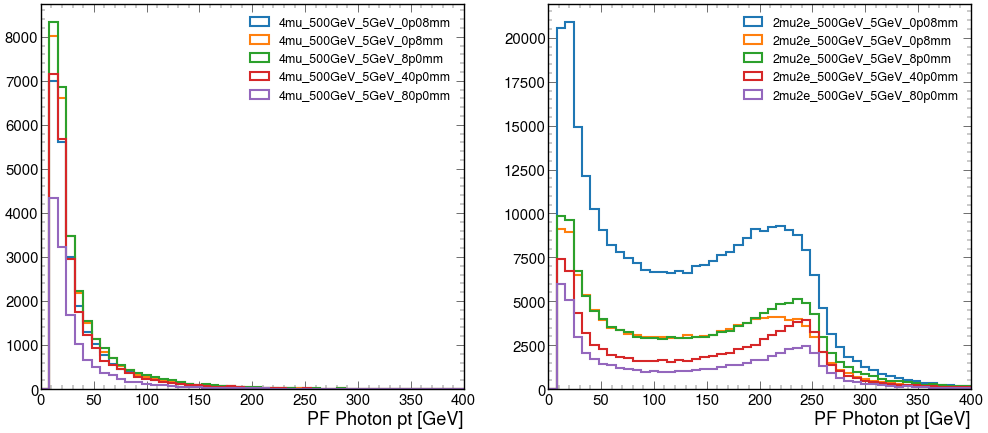

In [23]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("pt", events_4mu[i_4mu].pt, events_2mu2e[i_2mu].pt)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].pt), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].pt), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
ax[0].set_xlim(0,400)
ax[1].set_xlim(0,400)
ax[0].set_xlabel('PF Photon pt [GeV]')
ax[1].set_xlabel('PF Photon pt [GeV]')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
plt.savefig("../Plots/PF_PHOTON/Basic/pt.png", bbox_inches="tight")

## sieie

4mu sieie structure: [[], [], [], [], [], [], [], [], [], [], ... [], [0.047], [], [], [], [], [], [], []]
2mu2e sieie structure: [[0.0174, 0.016], [0.0507, 0.0468], ... 0.0167, 0.0204], [0.0089], [0.00925]]
4mu sieie structure: [[], [], [], [], [], [], [0.00884], [], ... [], [], [], [], [], [], [], [0.0278]]
2mu2e sieie structure: [[0.0166, 0.0174], [0.00924, 0.017], ... 0.0164], [0.00842], [0.00896, 0.0104]]
4mu sieie structure: [[], [], [], [], [], [], [], [], [], ... [0.0117], [], [], [], [0.00826], [], [], []]
2mu2e sieie structure: [[0.0171, 0.0154], [0.00937, 0.0132], ... 0.0164], [0.0158, 0.0286], [0.00919]]
4mu sieie structure: [[], [0.00907], [0.00957, 0.0178], [], [], ... [], [], [], [], [0.0375], [0.0121]]
2mu2e sieie structure: [[0.0456], [0.0141], [], [], [], ... [0.0153, 0.0168], [0.0111, 0.0113], [0.0254]]
4mu sieie structure: [[], [], [], [], [], [], [], [], [], ... [], [], [], [0.0131], [], [], [], [], []]
2mu2e sieie structure: [[], [], [], [0.0226, 0.0437], [0.0289]

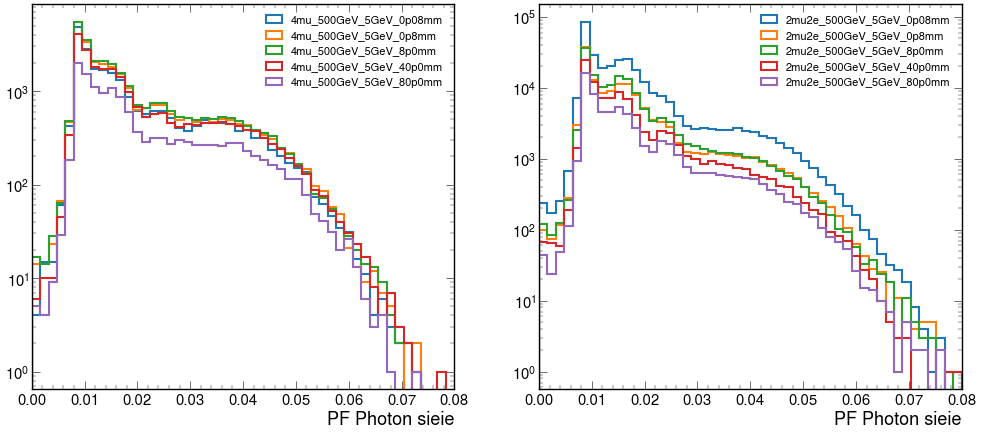

In [24]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("sieie", events_4mu[i_4mu].sieie, events_2mu2e[i_2mu].sieie)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].sieie), range=(0,0.08), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].sieie), range=(0,0.08), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
ax[0].set_xlim(0,0.08)
ax[1].set_xlim(0,0.08)
ax[0].set_xlabel('PF Photon sieie')
ax[1].set_xlabel('PF Photon sieie')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/PF_PHOTON/Basic/sieie.png", bbox_inches="tight")

## r9

4mu r9 structure: [[], [], [], [], [], [], [], [], [], [], ... [], [0.958], [], [], [], [], [], [], []]
2mu2e r9 structure: [[0.979, 0.976], [0.961, 1.08], [0.86], ... [0.971, 0.916], [0.652], [0.939]]
4mu r9 structure: [[], [], [], [], [], [], [0.835], [], [], ... [], [], [], [], [], [], [], [0.687]]
2mu2e r9 structure: [[0.771, 0.852], [0.952, 0.557], [0.965, ... 0.874, 0.951], [0.923], [0.893, 0.683]]
4mu r9 structure: [[], [], [], [], [], [], [], [], [], [], ... [0.945], [], [], [], [1], [], [], []]
2mu2e r9 structure: [[0.862, 1.02], [0.968, 0.506], [0.585], ... [0.888, 0.712], [0.887, 0.809], [0.743]]
4mu r9 structure: [[], [0.994], [0.989, 1.04], [], [], [], ... [], [], [], [], [], [0.521], [0.962]]
2mu2e r9 structure: [[0.639], [0.477], [], [], [], [], ... 2.83], [0.973, 0.99], [1.01, 1.49], [0.884]]
4mu r9 structure: [[], [], [], [], [], [], [], [], [], [], ... [], [], [], [0.923], [], [], [], [], []]
2mu2e r9 structure: [[], [], [], [0.964, 0.838], [0.963], [0.938, ... [0.639

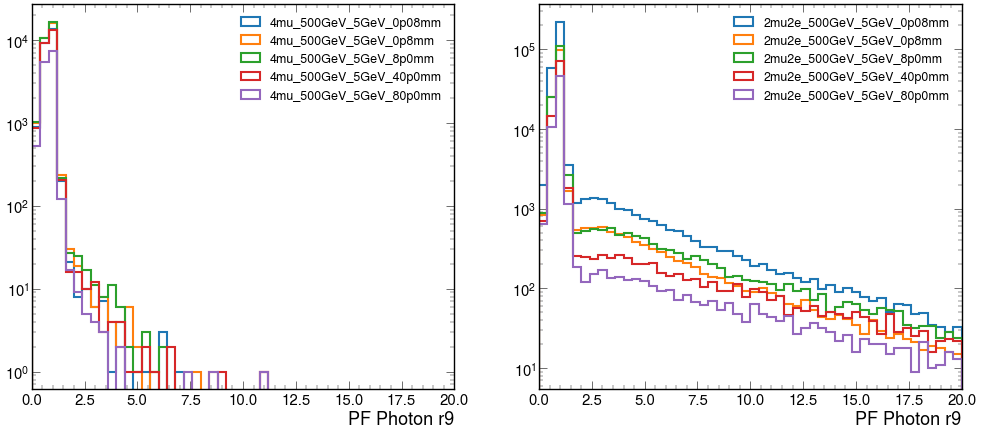

In [26]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("r9", events_4mu[i_4mu].r9, events_2mu2e[i_2mu].r9)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].r9), range=(0,20), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].r9), range=(0,20), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
ax[0].set_xlim(0,20)
ax[1].set_xlim(0,20)
ax[0].set_xlabel('PF Photon r9')
ax[1].set_xlabel('PF Photon r9')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/PF_PHOTON/Basic/r9.png", bbox_inches="tight")